In [ ]:
#Cenário 2

17699.75

In [ ]:
import pandas as pd
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import export_graphviz
import graphviz
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import *
from sklearn.utils import resample
from tqdm import tqdm
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive',  force_remount=True)
df_balanced= pd.read_csv('/content/drive/My Drive/DarkMatter/Metadata_Familia.csv') #Dataset Balanceado

Mounted at /content/drive


<Axes: xlabel='Family', ylabel='count'>

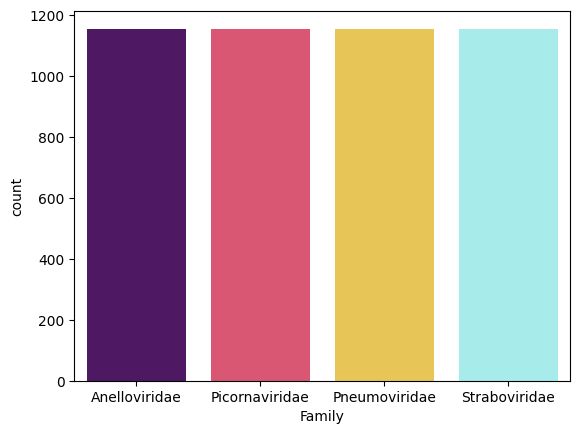

In [ ]:
import seaborn as sns
colors = ["#540D6E", "#ee4266", "#FFD23F", "#9CF6F6"]
sns.set_palette(colors)
sns.countplot(data=df_balanced, x = 'Family', hue = 'Family', palette=sns.color_palette(colors, 4))

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Separando as features (X) e o rótulo (y)
X = df_balanced.drop(columns=['Family'])
y = df_balanced['Family']

# Convertendo rótulos categóricos para numéricos
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.25, random_state=42)

In [ ]:
from sklearn.utils import resample
n_bootstrap = 1000
random_state = 42

**XGBoost**

In [ ]:
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier

In [ ]:
f1_xgb = []
precision_xgb = []
MCC_xgb = []
recall_xgb = []
accuracy_xgb = []
feature_importances_xgb = []

label_encoder = LabelEncoder()

# Realizar o bootstrap
for i in tqdm(range(n_bootstrap), desc="Bootstrapping"):
    # Reamostragem com reposição
    X_resampled, y_resampled = resample(X_train, y_train, random_state=random_state + i)

    # Encode the target variable using LabelEncoder
    y_resampled_encoded = label_encoder.fit_transform(y_resampled)

    # Treinar o modelo na amostra bootstrap
    xgb = XGBClassifier(eval_metric='logloss', random_state=random_state + i) #disable the internal label encoder
    xgb.fit(X_resampled, y_resampled_encoded)

     # Avaliar o modelo no conjunto de teste original
    y_pred = xgb.predict(X_test)
    feature_importances_xgb.append(xgb.feature_importances_)

    # Decode the predicted values back to original labels
    y_pred_decoded = label_encoder.inverse_transform(y_pred)

    # Calcular as métricas using the original labels
    accuracy_xgb.append(accuracy_score(y_test, y_pred_decoded))
    f1_xgb.append(f1_score(y_test, y_pred_decoded, average="weighted"))
    precision_xgb.append(precision_score(y_test, y_pred_decoded, average="weighted"))
    recall_xgb.append(recall_score(y_test, y_pred_decoded, average="weighted"))
    MCC_xgb.append(matthews_corrcoef(y_test, y_pred_decoded))

Bootstrapping: 100%|██████████| 1000/1000 [1:08:49<00:00,  4.13s/it]


Accuracy: 0.9957 (95% CI: 0.9948 - 0.9974)
Precision: 0.9957 (95% CI: 0.9948 - 0.9974)
Recall: 0.9957 (95% CI: 0.9948 - 0.9974)
F1-Score: 0.9957 (95% CI: 0.9948 - 0.9974)
MCC: 0.9942 (95% CI: 0.9931 - 0.9965)


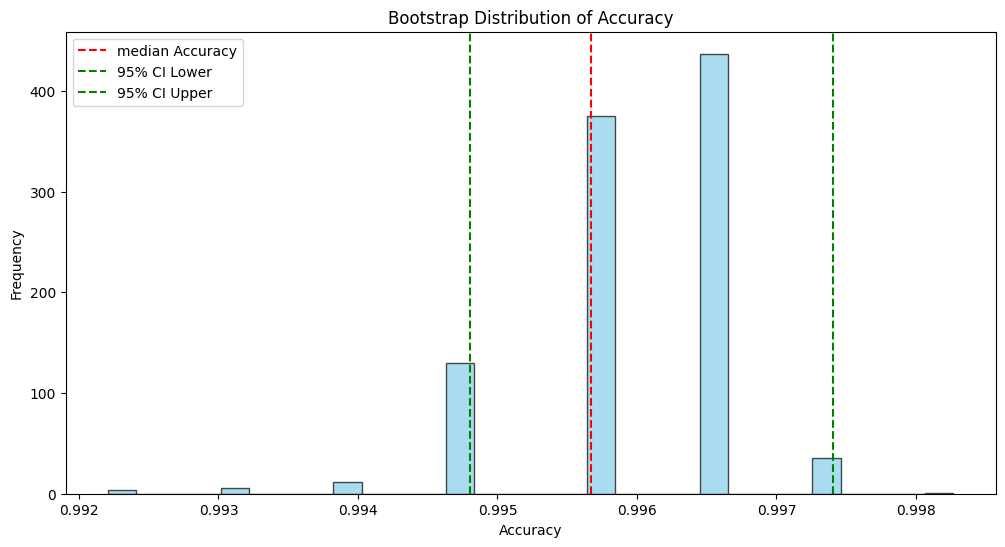

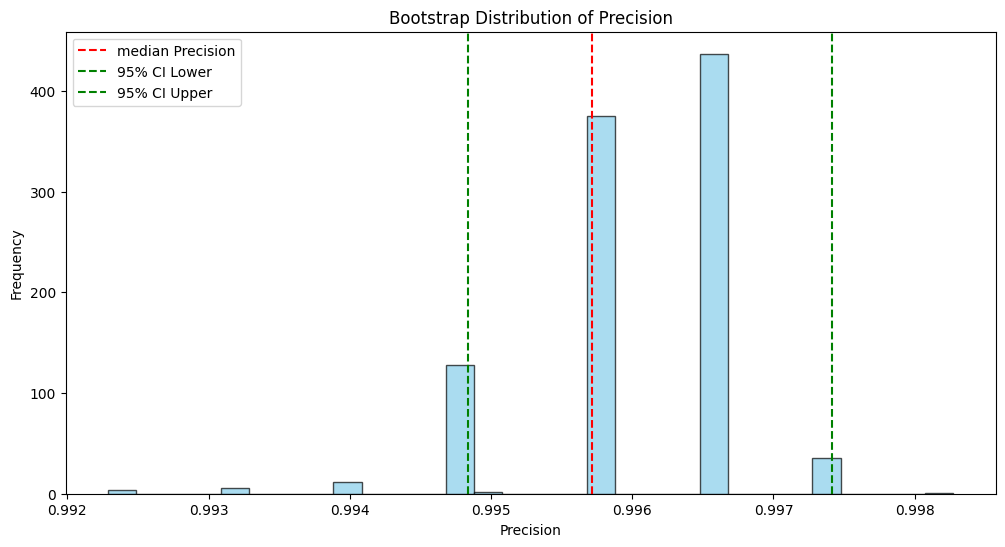

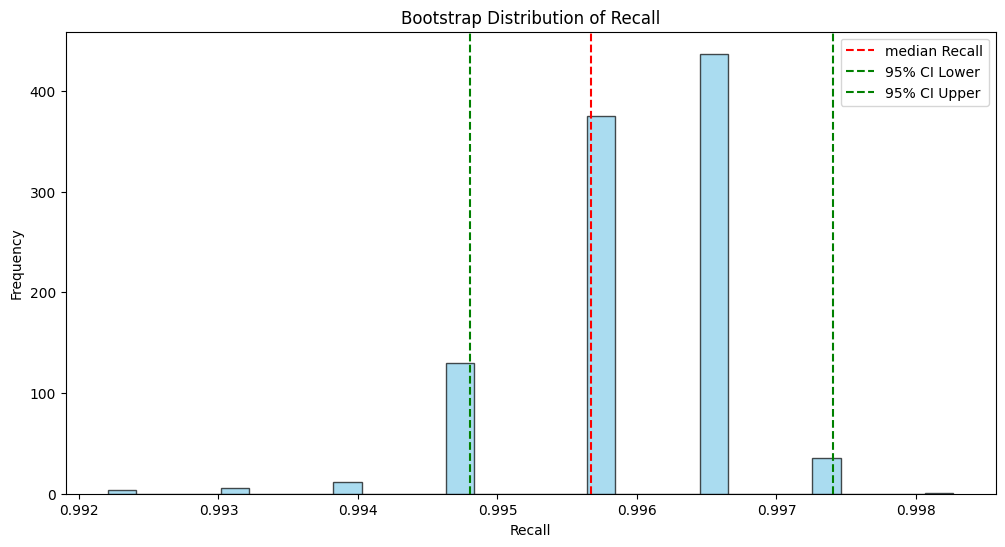

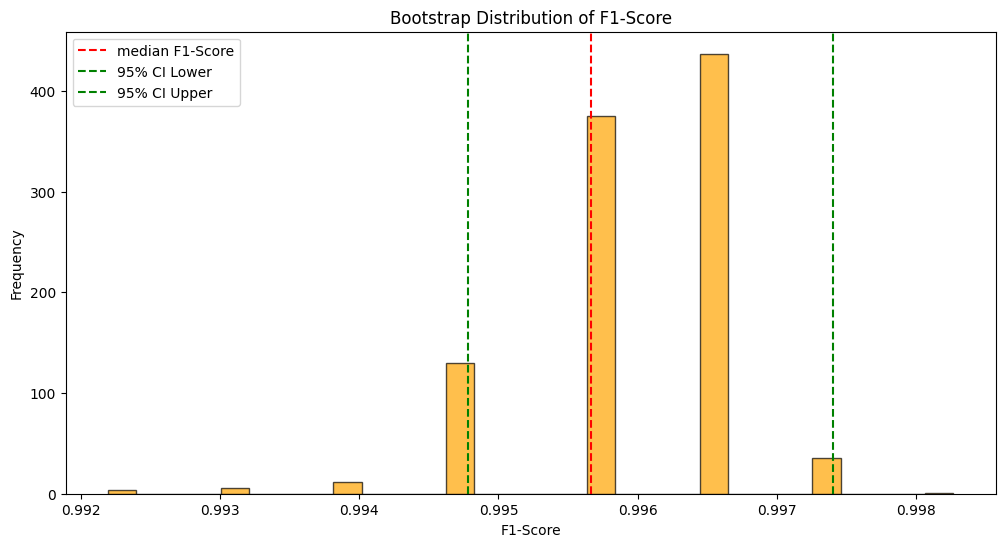

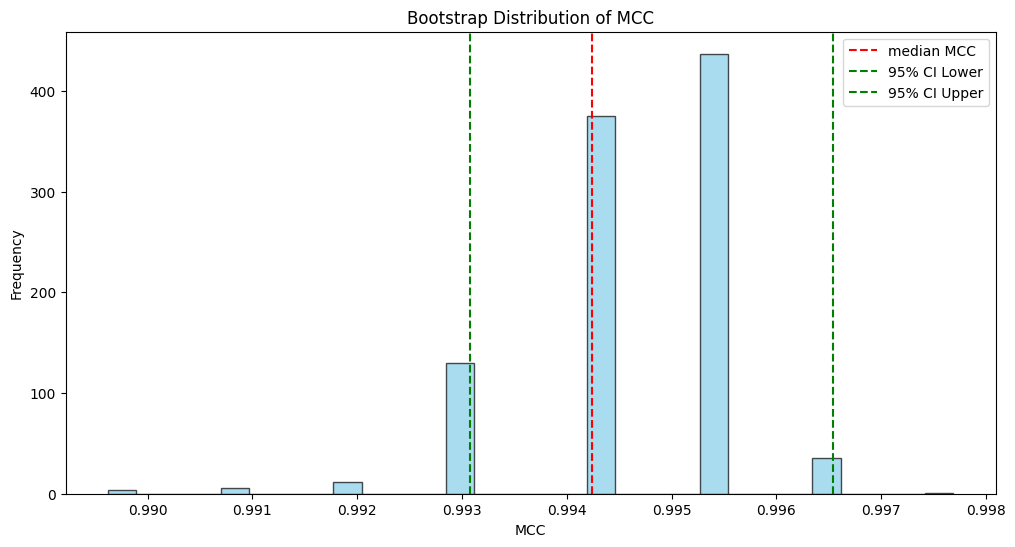

In [ ]:
# Calcular estatísticas
accuracy_median = np.median(accuracy_xgb)
accuracy_ci = (np.percentile(accuracy_xgb, 2.5), np.percentile(accuracy_xgb, 97.5))

f1_median = np.median(f1_xgb)
f1_ci = (np.percentile(f1_xgb, 2.5), np.percentile(f1_xgb, 97.5))

precision_median = np.median(precision_xgb)
precision_ci = (np.percentile(precision_xgb, 2.5), np.percentile(precision_xgb, 97.5))

recall_median = np.median(recall_xgb)
recall_ci = (np.percentile(recall_xgb, 2.5), np.percentile(recall_xgb, 97.5))

MCC_median = np.median(MCC_xgb)
MCC_ci= (np.percentile(MCC_xgb, 2.5), np.percentile(MCC_xgb, 97.5))

# Exibir resultados
print(f"Accuracy: {accuracy_median:.4f} (95% CI: {accuracy_ci[0]:.4f} - {accuracy_ci[1]:.4f})")
print(f"Precision: {precision_median:.4f} (95% CI: {precision_ci[0]:.4f} - {precision_ci[1]:.4f})")
print(f"Recall: {recall_median:.4f} (95% CI: {recall_ci[0]:.4f} - {recall_ci[1]:.4f})")
print(f"F1-Score: {f1_median:.4f} (95% CI: {f1_ci[0]:.4f} - {f1_ci[1]:.4f})")
print(f"MCC: {MCC_median:.4f} (95% CI: {MCC_ci[0]:.4f} - {MCC_ci[1]:.4f})")


# Visualização
import matplotlib.pyplot as plt

# Plot para acurácia
plt.figure(figsize=(12, 6))
plt.hist(accuracy_xgb, bins=30, color="skyblue", alpha=0.7, edgecolor="black")
plt.axvline(accuracy_median, color="red", linestyle="--", label="median Accuracy")
plt.axvline(accuracy_ci[0], color="green", linestyle="--", label="95% CI Lower")
plt.axvline(accuracy_ci[1], color="green", linestyle="--", label="95% CI Upper")
plt.title("Bootstrap Distribution of Accuracy")
plt.xlabel("Accuracy")
plt.ylabel("Frequency")
plt.legend()
plt.show()

#Precisão
plt.figure(figsize=(12, 6))
plt.hist(precision_xgb, bins=30, color="skyblue", alpha=0.7, edgecolor="black")
plt.axvline(precision_median, color="red", linestyle="--", label="median Precision")
plt.axvline(precision_ci[0], color="green", linestyle="--", label="95% CI Lower")
plt.axvline(precision_ci[1], color="green", linestyle="--", label="95% CI Upper")
plt.title("Bootstrap Distribution of Precision")
plt.xlabel("Precision")
plt.ylabel("Frequency")
plt.legend()
plt.show()

#Revocação
plt.figure(figsize=(12, 6))
plt.hist(recall_xgb, bins=30, color="skyblue", alpha=0.7, edgecolor="black")
plt.axvline(recall_median, color="red", linestyle="--", label="median Recall")
plt.axvline(recall_ci[0], color="green", linestyle="--", label="95% CI Lower")
plt.axvline(recall_ci[1], color="green", linestyle="--", label="95% CI Upper")
plt.title("Bootstrap Distribution of Recall")
plt.xlabel("Recall")
plt.ylabel("Frequency")
plt.legend()
plt.show()

# Plot para F1-score
plt.figure(figsize=(12, 6))
plt.hist(f1_xgb, bins=30, color="orange", alpha=0.7, edgecolor="black")
plt.axvline(f1_median, color="red", linestyle="--", label="median F1-Score")
plt.axvline(f1_ci[0], color="green", linestyle="--", label="95% CI Lower")
plt.axvline(f1_ci[1], color="green", linestyle="--", label="95% CI Upper")
plt.title("Bootstrap Distribution of F1-Score")
plt.xlabel("F1-Score")
plt.ylabel("Frequency")
plt.legend()
plt.show()

#MCC
plt.figure(figsize=(12, 6))
plt.hist(MCC_xgb, bins=30, color="skyblue", alpha=0.7, edgecolor="black")
plt.axvline(MCC_median, color="red", linestyle="--", label="median MCC")
plt.axvline(MCC_ci[0], color="green", linestyle="--", label="95% CI Lower")
plt.axvline(MCC_ci[1], color="green", linestyle="--", label="95% CI Upper")
plt.title("Bootstrap Distribution of MCC")
plt.xlabel("MCC")
plt.ylabel("Frequency")
plt.legend()
plt.show()

In [ ]:
average_feature_importances = np.median(feature_importances_xgb, axis=0)

feature_names = X_train.columns

importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': average_feature_importances
}).sort_values(by='Importance', ascending=False)

# Mostrar os valores das features
importance_df.head(10)

,Feature,Importance
82,AGAC,0.289069
52,ATCA,0.280132
483,RdRP_1,0.197867
1,Length,0.157398
70,CACA,0.008900
146,TCAA,0.003027
3,AACA,0.002742
218,AAGT,0.001635
129,GGCG,0.001591
162,ATTG,0.001184


In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
import xgboost as xgb
y_encoded = label_encoder.fit_transform(y_train)

In [ ]:
import xgboost
import sklearn

print("XGBoost version:", xgboost.__version__)  # Deve estar acima de 1.5.0
print("Scikit-Learn version:", sklearn.__version__)  # Deve estar acima de 1.0


XGBoost version: 2.1.4
Scikit-Learn version: 1.6.1


In [ ]:
xgb = XGBClassifier(eval_metric='logloss', random_state= 42)
xgb.fit(X_train, y_encoded)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

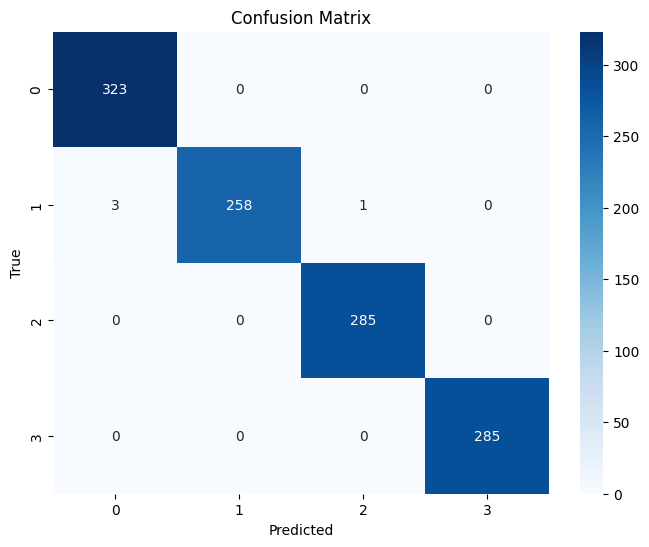

In [ ]:
# prompt: create a confusion mnatrix for the model

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_test contains the true labels and y_pred contains the predicted labels
# from your previous code, after the model training and prediction.

# You need to have y_test and y_pred available here
# Example using the last prediction from the loop (replace this with your actual y_pred)
y_pred = xgb.predict(X_test)
y_pred_decoded = label_encoder.inverse_transform(y_pred)


cm = confusion_matrix(y_test, y_pred_decoded)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Listas para armazenar as métricas
accuracy_rf = []
f1_rf = []
precision_rf = []
MCC_rf = []
recall_rf = []
feature_importances_rf = []

# Realizar o bootstrap
for i in tqdm(range(n_bootstrap), desc="Bootstrapping"):
    # Reamostragem com reposição
    X_resampled, y_resampled = resample(X_train, y_train, random_state=random_state + i)

    # Treinar o modelo na amostra bootstrap
    rf = RandomForestClassifier(max_depth = 3, min_samples_leaf = 1, min_samples_split = 2, n_estimators = 100, max_features = "sqrt", random_state =  random_state + 1)
    rf.fit(X_resampled, y_resampled)

    # Avaliar o modelo no conjunto de teste original
    y_pred = rf.predict(X_test)
    feature_importances_rf.append(rf.feature_importances_)

    # Calcular as métricas
    accuracy_rf.append(accuracy_score(y_test, y_pred))
    f1_rf.append(f1_score(y_test, y_pred, average="weighted"))
    precision_rf.append(precision_score(y_test, y_pred,average = 'weighted'))
    recall_rf.append(recall_score(y_test, y_pred, average='weighted'))
    MCC_rf.append(matthews_corrcoef(y_test, y_pred))

Bootstrapping: 100%|██████████| 1000/1000 [20:45<00:00,  1.25s/it]


Accuracy: 0.9991 (95% CI: 0.9983 - 1.0000)
Precision: 0.9991 (95% CI: 0.9983 - 1.0000)
Recall: 0.9991 (95% CI: 0.9983 - 1.0000)
F1-Score: 0.9991 (95% CI: 0.9983 - 1.0000)
MCC: 0.9988 (95% CI: 0.9977 - 1.0000)


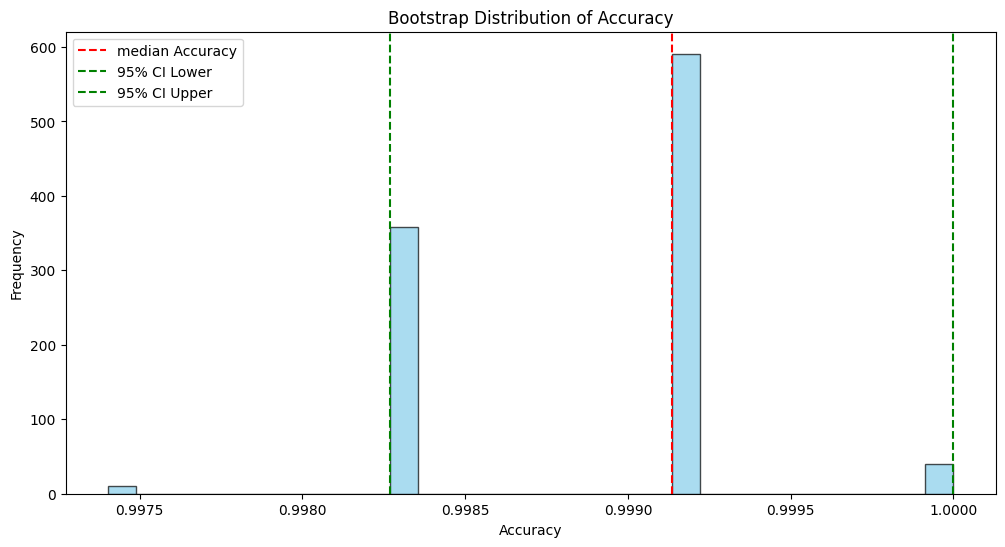

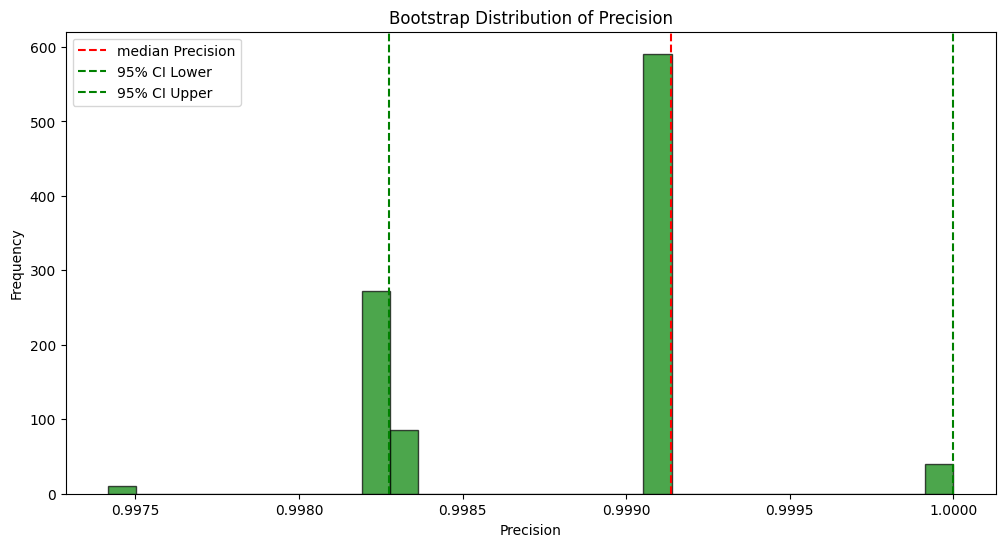

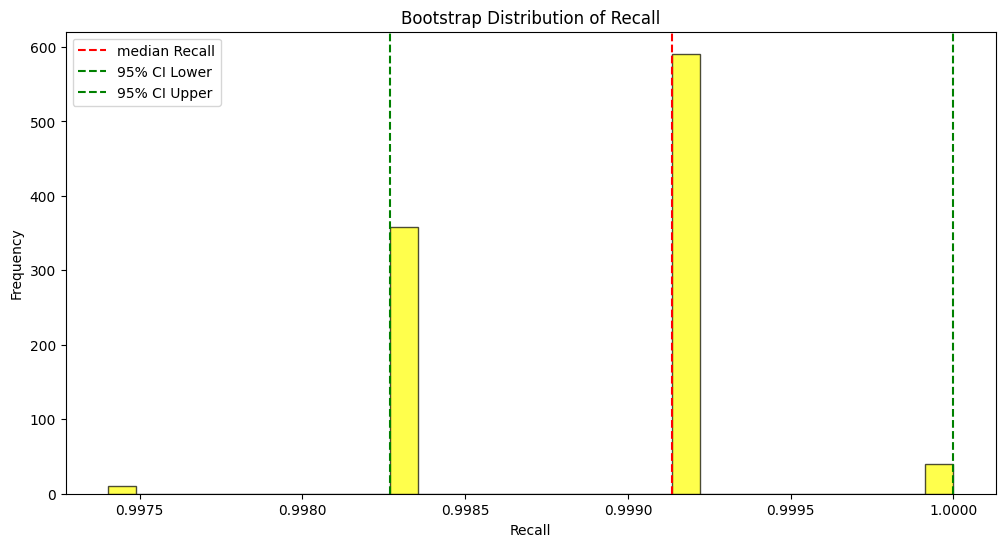

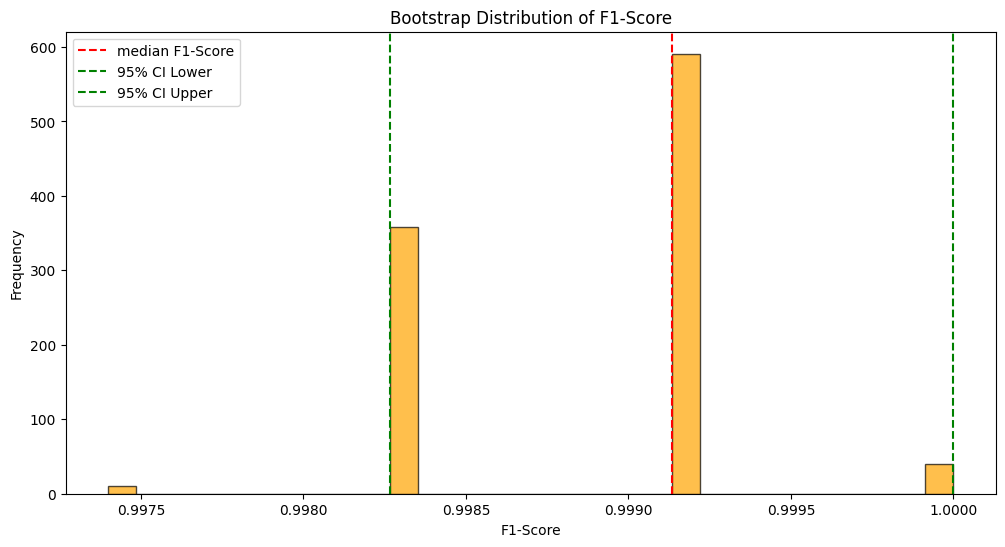

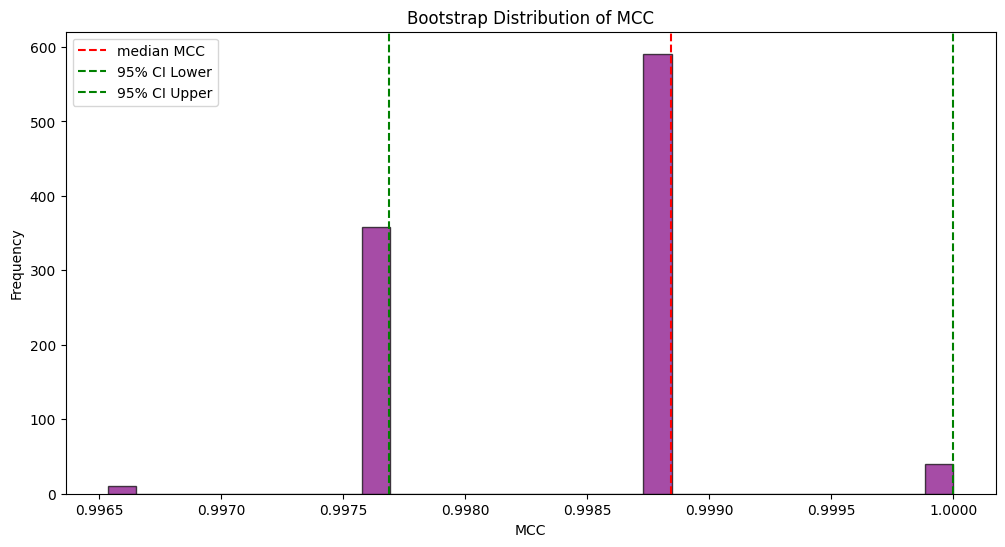

In [ ]:
# Calcular estatísticas
accuracy_median = np.median(accuracy_rf)
accuracy_ci = (np.percentile(accuracy_rf, 2.5), np.percentile(accuracy_rf, 97.5))

f1_median = np.median(f1_rf)
f1_ci = (np.percentile(f1_rf, 2.5), np.percentile(f1_rf, 97.5))

precision_median = np.median(precision_rf)
precision_ci = (np.percentile(precision_rf, 2.5), np.percentile(precision_rf, 97.5))

recall_median = np.median(recall_rf)
recall_ci = (np.percentile(recall_rf, 2.5), np.percentile(recall_rf, 97.5))

MCC_median = np.median(MCC_rf)
MCC_ci= (np.percentile(MCC_rf, 2.5), np.percentile(MCC_rf, 97.5))

# Exibir resultados
print(f"Accuracy: {accuracy_median:.4f} (95% CI: {accuracy_ci[0]:.4f} - {accuracy_ci[1]:.4f})")
print(f"Precision: {precision_median:.4f} (95% CI: {precision_ci[0]:.4f} - {precision_ci[1]:.4f})")
print(f"Recall: {recall_median:.4f} (95% CI: {recall_ci[0]:.4f} - {recall_ci[1]:.4f})")
print(f"F1-Score: {f1_median:.4f} (95% CI: {f1_ci[0]:.4f} - {f1_ci[1]:.4f})")
print(f"MCC: {MCC_median:.4f} (95% CI: {MCC_ci[0]:.4f} - {MCC_ci[1]:.4f})")


# Visualização
import matplotlib.pyplot as plt

# Plot para acurácia
plt.figure(figsize=(12, 6))
plt.hist(accuracy_rf, bins=30, color="skyblue", alpha=0.7, edgecolor="black")
plt.axvline(accuracy_median, color="red", linestyle="--", label="median Accuracy")
plt.axvline(accuracy_ci[0], color="green", linestyle="--", label="95% CI Lower")
plt.axvline(accuracy_ci[1], color="green", linestyle="--", label="95% CI Upper")
plt.title("Bootstrap Distribution of Accuracy")
plt.xlabel("Accuracy")
plt.ylabel("Frequency")
plt.legend()
plt.show()

#Precisão
plt.figure(figsize=(12, 6))
plt.hist(precision_rf, bins=30, color="green", alpha=0.7, edgecolor="black")
plt.axvline(precision_median, color="red", linestyle="--", label="median Precision")
plt.axvline(precision_ci[0], color="green", linestyle="--", label="95% CI Lower")
plt.axvline(precision_ci[1], color="green", linestyle="--", label="95% CI Upper")
plt.title("Bootstrap Distribution of Precision")
plt.xlabel("Precision")
plt.ylabel("Frequency")
plt.legend()
plt.show()

#Revocação
plt.figure(figsize=(12, 6))
plt.hist(recall_rf, bins=30, color="yellow", alpha=0.7, edgecolor="black")
plt.axvline(recall_median, color="red", linestyle="--", label="median Recall")
plt.axvline(recall_ci[0], color="green", linestyle="--", label="95% CI Lower")
plt.axvline(recall_ci[1], color="green", linestyle="--", label="95% CI Upper")
plt.title("Bootstrap Distribution of Recall")
plt.xlabel("Recall")
plt.ylabel("Frequency")
plt.legend()
plt.show()

# Plot para F1-score
plt.figure(figsize=(12, 6))
plt.hist(f1_rf, bins=30, color="orange", alpha=0.7, edgecolor="black")
plt.axvline(f1_median, color="red", linestyle="--", label="median F1-Score")
plt.axvline(f1_ci[0], color="green", linestyle="--", label="95% CI Lower")
plt.axvline(f1_ci[1], color="green", linestyle="--", label="95% CI Upper")
plt.title("Bootstrap Distribution of F1-Score")
plt.xlabel("F1-Score")
plt.ylabel("Frequency")
plt.legend()
plt.show()

#MCC
plt.figure(figsize=(12, 6))
plt.hist(MCC_rf, bins=30, color="purple", alpha=0.7, edgecolor="black")
plt.axvline(MCC_median, color="red", linestyle="--", label="median MCC")
plt.axvline(MCC_ci[0], color="green", linestyle="--", label="95% CI Lower")
plt.axvline(MCC_ci[1], color="green", linestyle="--", label="95% CI Upper")
plt.title("Bootstrap Distribution of MCC")
plt.xlabel("MCC")
plt.ylabel("Frequency")
plt.legend()
plt.show()

**Decision Tree**

Bootstrapping: 100%|██████████| 1000/1000 [05:58<00:00,  2.79it/s]


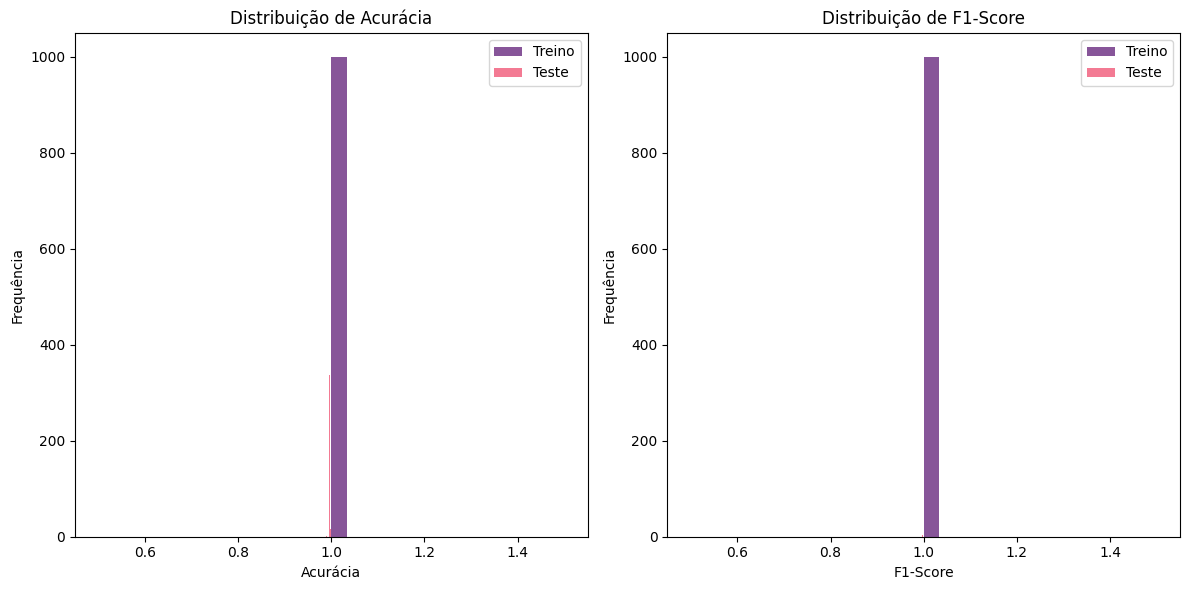

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import resample
from tqdm import tqdm
import numpy as np

# Parâmetros do bootstrap
n_bootstrap = 1000
random_state = 42

# Listas para armazenar as métricas
accuracy_dt = []
f1_dt = []
precision_dt = []
MCC_dt= []
recall_dt = []
train_accuracy_scores = []
train_f1_scores = []

# Realizar o bootstrap
for i in tqdm(range(n_bootstrap), desc="Bootstrapping"):
    # Reamostragem com reposição
    X_resampled, y_resampled = resample(X_train, y_train, random_state=random_state + i)

    # Treinar o modelo na amostra bootstrap
    dt = DecisionTreeClassifier(random_state=random_state + i)
    dt.fit(X_resampled, y_resampled)

    y_pred = dt.predict(X_test)

    #Métricas Treino
    train_accuracy_scores.append(accuracy_score(y_resampled, dt.predict(X_resampled)))
    train_f1_scores.append(f1_score(y_resampled, dt.predict(X_resampled), average="weighted"))

    # Calcular as métricas teste
    accuracy_dt.append(accuracy_score(y_test, y_pred))
    f1_dt.append(f1_score(y_test, y_pred, average="weighted"))
    precision_dt.append(precision_score(y_test, y_pred,average = 'weighted'))
    recall_dt.append(recall_score(y_test, y_pred, average='weighted'))
    MCC_dt.append(matthews_corrcoef(y_test, y_pred))

# Plotar as distribuições
plt.figure(figsize=(12, 6))

# Acurácia
plt.subplot(1, 2, 1)
plt.hist(train_accuracy_scores, bins=30, alpha=0.7, label="Treino")
plt.hist(accuracy_dt, bins=30, alpha=0.7, label="Teste")
plt.title("Distribuição de Acurácia")
plt.xlabel("Acurácia")
plt.ylabel("Frequência")
plt.legend()

# F1-Score
plt.subplot(1, 2, 2)
plt.hist(train_f1_scores, bins=30, alpha=0.7, label="Treino")
plt.hist(f1_dt, bins=30, alpha=0.7, label="Teste")
plt.title("Distribuição de F1-Score")
plt.xlabel("F1-Score")
plt.ylabel("Frequência")
plt.legend()

plt.tight_layout()
plt.show()

Accuracy: 0.9957 (95% CI: 0.9931 - 0.9965)
Precision: 0.9991 (95% CI: 0.9931 - 0.9966)
Recall: 0.9957 (95% CI: 0.9931 - 0.9965)
F1-Score: 0.9957 (95% CI: 0.9931 - 0.9965)
MCC: 0.9942 (95% CI: 0.9908 - 0.9954)


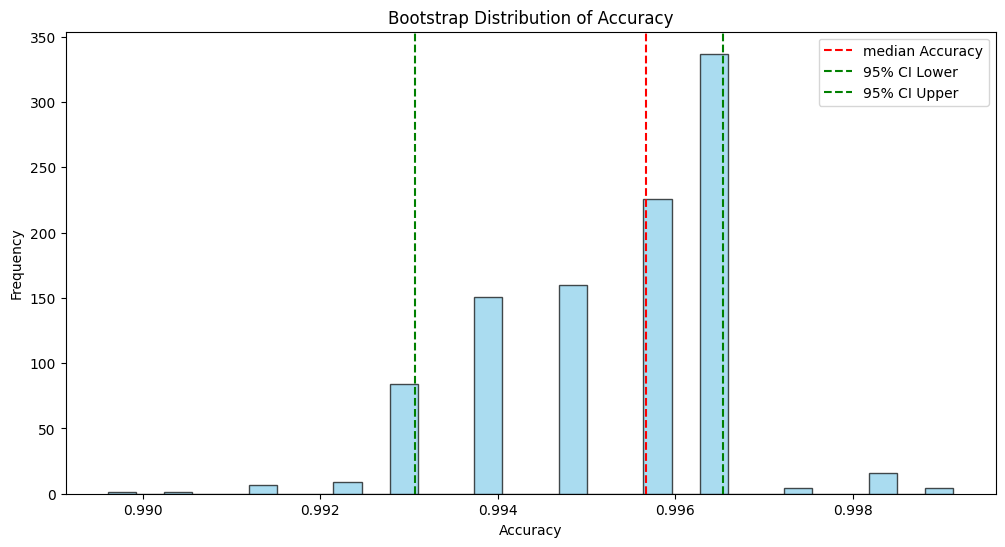

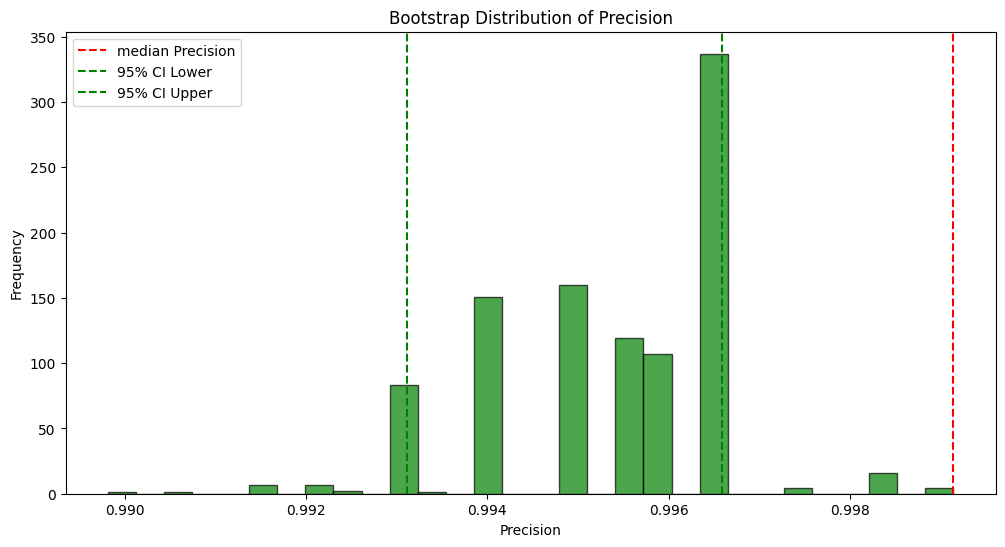

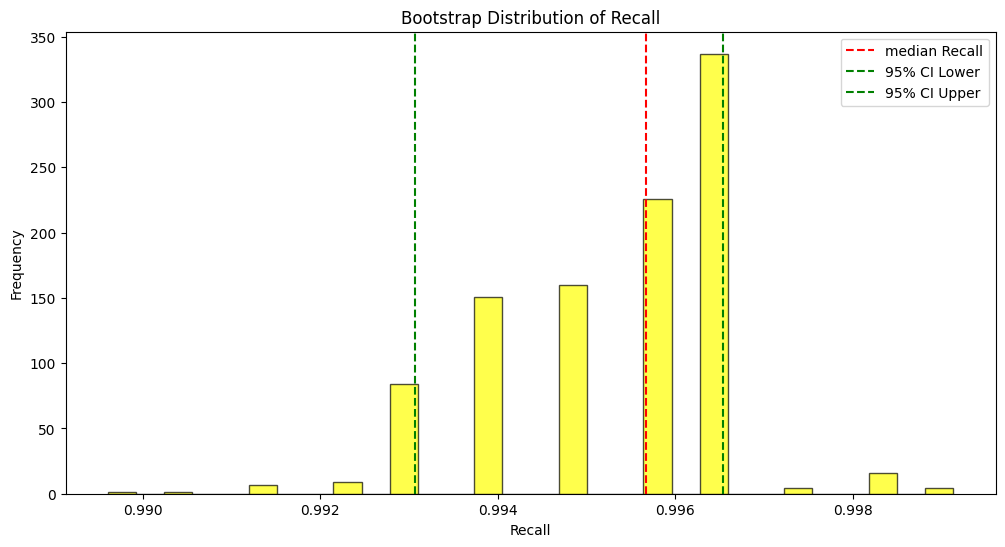

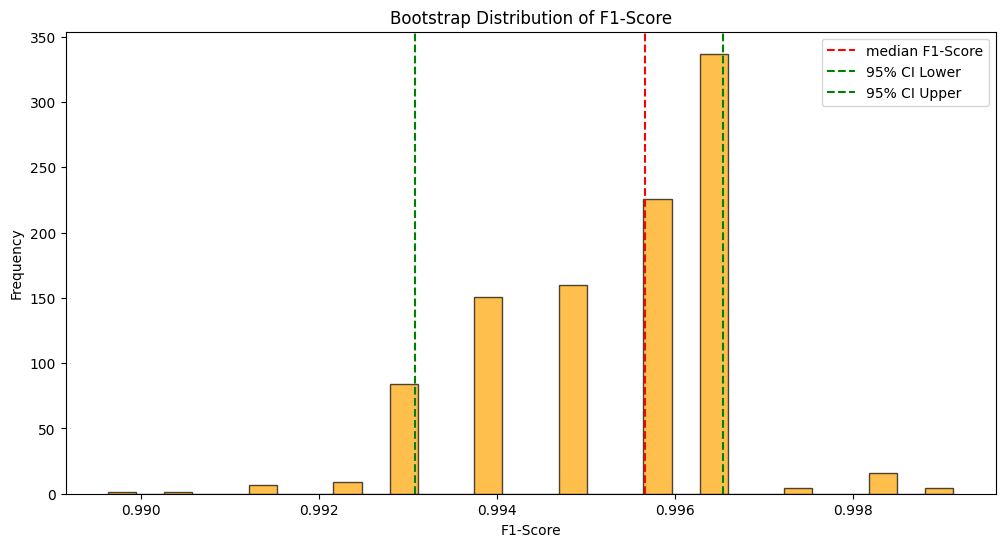

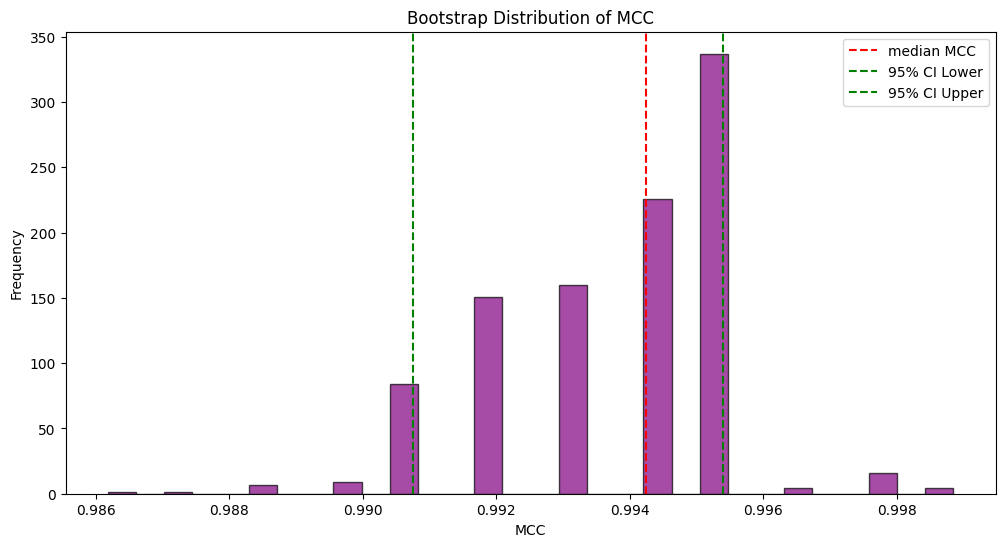

In [ ]:
# Calcular estatísticas
accuracy_median = np.median(accuracy_dt)
accuracy_ci = (np.percentile(accuracy_dt, 2.5), np.percentile(accuracy_dt, 97.5))

f1_median = np.median(f1_dt)
f1_ci = (np.percentile(f1_dt, 2.5), np.percentile(f1_dt, 97.5))

precision_dt_median = np.median(precision_dt)
precision_ci = (np.percentile(precision_dt, 2.5), np.percentile(precision_dt, 97.5))

recall_median = np.median(recall_dt)
recall_ci = (np.percentile(recall_dt, 2.5), np.percentile(recall_dt, 97.5))

MCC_median = np.median(MCC_dt)
MCC_ci= (np.percentile(MCC_dt, 2.5), np.percentile(MCC_dt, 97.5))

# Exibir resultados
print(f"Accuracy: {accuracy_median:.4f} (95% CI: {accuracy_ci[0]:.4f} - {accuracy_ci[1]:.4f})")
print(f"Precision: {precision_median:.4f} (95% CI: {precision_ci[0]:.4f} - {precision_ci[1]:.4f})")
print(f"Recall: {recall_median:.4f} (95% CI: {recall_ci[0]:.4f} - {recall_ci[1]:.4f})")
print(f"F1-Score: {f1_median:.4f} (95% CI: {f1_ci[0]:.4f} - {f1_ci[1]:.4f})")
print(f"MCC: {MCC_median:.4f} (95% CI: {MCC_ci[0]:.4f} - {MCC_ci[1]:.4f})")


# Visualização
import matplotlib.pyplot as plt

# Plot para acurácia
plt.figure(figsize=(12, 6))
plt.hist(accuracy_dt, bins=30, color="skyblue", alpha=0.7, edgecolor="black")
plt.axvline(accuracy_median, color="red", linestyle="--", label="median Accuracy")
plt.axvline(accuracy_ci[0], color="green", linestyle="--", label="95% CI Lower")
plt.axvline(accuracy_ci[1], color="green", linestyle="--", label="95% CI Upper")
plt.title("Bootstrap Distribution of Accuracy")
plt.xlabel("Accuracy")
plt.ylabel("Frequency")
plt.legend()
plt.show()

#Precisão
plt.figure(figsize=(12, 6))
plt.hist(precision_dt, bins=30, color="green", alpha=0.7, edgecolor="black")
plt.axvline(precision_median, color="red", linestyle="--", label="median Precision")
plt.axvline(precision_ci[0], color="green", linestyle="--", label="95% CI Lower")
plt.axvline(precision_ci[1], color="green", linestyle="--", label="95% CI Upper")
plt.title("Bootstrap Distribution of Precision")
plt.xlabel("Precision")
plt.ylabel("Frequency")
plt.legend()
plt.show()

#Revocação
plt.figure(figsize=(12, 6))
plt.hist(recall_dt, bins=30, color="yellow", alpha=0.7, edgecolor="black")
plt.axvline(recall_median, color="red", linestyle="--", label="median Recall")
plt.axvline(recall_ci[0], color="green", linestyle="--", label="95% CI Lower")
plt.axvline(recall_ci[1], color="green", linestyle="--", label="95% CI Upper")
plt.title("Bootstrap Distribution of Recall")
plt.xlabel("Recall")
plt.ylabel("Frequency")
plt.legend()
plt.show()

# Plot para F1-score
plt.figure(figsize=(12, 6))
plt.hist(f1_dt, bins=30, color="orange", alpha=0.7, edgecolor="black")
plt.axvline(f1_median, color="red", linestyle="--", label="median F1-Score")
plt.axvline(f1_ci[0], color="green", linestyle="--", label="95% CI Lower")
plt.axvline(f1_ci[1], color="green", linestyle="--", label="95% CI Upper")
plt.title("Bootstrap Distribution of F1-Score")
plt.xlabel("F1-Score")
plt.ylabel("Frequency")
plt.legend()
plt.show()

#MCC
plt.figure(figsize=(12, 6))
plt.hist(MCC_dt, bins=30, color="purple", alpha=0.7, edgecolor="black")
plt.axvline(MCC_median, color="red", linestyle="--", label="median MCC")
plt.axvline(MCC_ci[0], color="green", linestyle="--", label="95% CI Lower")
plt.axvline(MCC_ci[1], color="green", linestyle="--", label="95% CI Upper")
plt.title("Bootstrap Distribution of MCC")
plt.xlabel("MCC")
plt.ylabel("Frequency")
plt.legend()
plt.show()

Comparação

In [ ]:
data_ac = {'RF': accuracy_rf,
          'XGB': accuracy_xgb,
          'DT': accuracy_dt}
data_ac = pd.DataFrame(data_ac).assign(metrica='Acurácia')
pd.DataFrame(data_ac).assign(metrica='Acurácia')

,RF,XGB,DT,metrica
0,0.998268,0.996537,0.995671,Acurácia
1,0.998268,0.995671,0.996537,Acurácia
2,0.999134,0.995671,0.993074,Acurácia
3,0.998268,0.995671,0.995671,Acurácia
4,0.998268,0.994805,0.994805,Acurácia
...,...,...,...,...
995,0.999134,0.995671,0.996537,Acurácia
996,0.999134,0.995671,0.996537,Acurácia
997,0.999134,0.996537,0.993074,Acurácia
998,0.999134,0.995671,0.991342,Acurácia


In [ ]:
data_rv = {'RF': recall_rf,
          'XGB': recall_xgb,
          'DT': recall_dt}
data_rv = pd.DataFrame(data_rv).assign(metrica='Recall')
pd.DataFrame(data_rv).assign(metrica='Recall')
data_rv

,RF,XGB,DT,metrica
0,0.998268,0.996537,0.995671,Recall
1,0.998268,0.995671,0.996537,Recall
2,0.999134,0.995671,0.993074,Recall
3,0.998268,0.995671,0.995671,Recall
4,0.998268,0.994805,0.994805,Recall
...,...,...,...,...
995,0.999134,0.995671,0.996537,Recall
996,0.999134,0.995671,0.996537,Recall
997,0.999134,0.996537,0.993074,Recall
998,0.999134,0.995671,0.991342,Recall


In [ ]:
data_pr = {'RF': precision_rf,
          'XGB': precision_xgb,
          'DT': precision_dt}
data_pr = pd.DataFrame(data_pr).assign(metrica='Precisão')
#pd.DataFrame(data_ac).assign(metrica='Acurácia')

In [ ]:
data_f1 = {'RF': f1_rf,
          'XGB': f1_xgb,
          'DT': f1_dt}
data_f1 = pd.DataFrame(data_f1).assign(metrica='F1')
#pd.DataFrame(data_ac).assign(metrica='Acurácia')

In [ ]:
data_mcc = {'RF': MCC_rf,
          'XGB': MCC_xgb,
          'DT': MCC_dt}
data_mcc = pd.DataFrame(data_mcc).assign(metrica='MCC')
pd.DataFrame(data_mcc).assign(metrica='MCC')

,RF,XGB,DT,metrica
0,0.997690,0.995386,0.994240,MCC
1,0.997690,0.994233,0.995388,MCC
2,0.998844,0.994234,0.990766,MCC
3,0.997690,0.994236,0.994240,MCC
4,0.997690,0.993083,0.993079,MCC
...,...,...,...,...
995,0.998844,0.994234,0.995386,MCC
996,0.998844,0.994233,0.995386,MCC
997,0.998844,0.995384,0.990764,MCC
998,0.998844,0.994234,0.988450,MCC


In [ ]:
cdf = pd.concat([data_f1, data_ac, data_pr, data_mcc, data_rv])
mdf = pd.melt(cdf, id_vars=['metrica'], var_name='Classifier')
print(mdf.head())

  metrica Classifier     value
0      F1         RF  0.998267
1      F1         RF  0.998267
2      F1         RF  0.999134
3      F1         RF  0.998268
4      F1         RF  0.998267


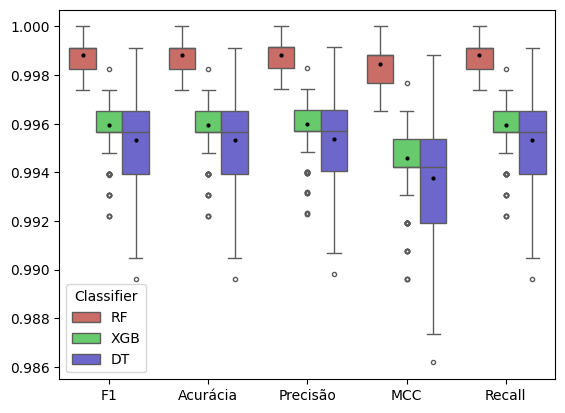

In [ ]:
import seaborn as sns
ax = sns.boxplot(x="metrica", y="value",
                 hue="Classifier",
                 data=mdf,
                 palette = sns.color_palette("hls", 3),
                 showmeans=True,
                 flierprops={"marker": "."},
                 meanprops={"marker":"o",
                       "markerfacecolor":"black",
                       "markeredgecolor":"black",
                      "markersize":"2"})
plt.xlabel("")
plt.ylabel("")
plt.savefig('/content/drive/My Drive/DarkMatter/boxplot2.svg', transparent=None, dpi=900, format='svg')
plt.show()

In [ ]:
import pandas as pd
import scipy.stats as stats
from statsmodels.formula.api import ols
import statsmodels.api as sm

# Filtrar para uma métrica específica, por exemplo, "Accuracy"
metrica_escolhida = "Acurácia"
df_anova = mdf[mdf["metrica"] == metrica_escolhida]

# Rodar o modelo ANOVA
modelo = ols("value ~ C(Classifier)", data=df_anova).fit()
anova_tabela = sm.stats.anova_lm(modelo, typ=2)

print(anova_tabela)

                 sum_sq      df         F  PR(>F)
C(Classifier)  0.007007     2.0  4073.721     0.0
Residual       0.002577  2997.0       NaN     NaN


In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Teste de Tukey
tukey = pairwise_tukeyhsd(endog=df_anova["value"], groups=df_anova["Classifier"], alpha=0.05)

# Exibir resultado
print(tukey)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower   upper  reject
--------------------------------------------------
    DT     RF   0.0035   0.0 0.0034  0.0036   True
    DT    XGB   0.0006   0.0 0.0005  0.0007   True
    RF    XGB  -0.0029   0.0 -0.003 -0.0028   True
--------------------------------------------------


In [ ]:
metrica_escolhida = "MCC"
df_anova = mdf[mdf["metrica"] == metrica_escolhida]

# Rodar o modelo ANOVA
modelo = ols("value ~ C(Classifier)", data=df_anova).fit()
anova_tabela = sm.stats.anova_lm(modelo, typ=2)

print(anova_tabela)

from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Teste de Tukey
tukey = pairwise_tukeyhsd(endog=df_anova["value"], groups=df_anova["Classifier"], alpha=0.05)

# Exibir resultado
print(tukey)

                 sum_sq      df            F  PR(>F)
C(Classifier)  0.012424     2.0  4065.940115     0.0
Residual       0.004579  2997.0          NaN     NaN
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower   upper  reject
--------------------------------------------------
    DT     RF   0.0047   0.0 0.0045  0.0048   True
    DT    XGB   0.0008   0.0 0.0007   0.001   True
    RF    XGB  -0.0038   0.0 -0.004 -0.0037   True
--------------------------------------------------


In [ ]:
metrica_escolhida = "Precisão"
df_anova = mdf[mdf["metrica"] == metrica_escolhida]
modelo = ols("value ~ C(Classifier)", data=df_anova).fit()
anova_tabela = sm.stats.anova_lm(modelo, typ=2)

print(anova_tabela)

from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Teste de Tukey
tukey = pairwise_tukeyhsd(endog=df_anova["value"], groups=df_anova["Classifier"], alpha=0.05)

# Exibir resultado
print(tukey)

                 sum_sq      df            F  PR(>F)
C(Classifier)  0.006844     2.0  4069.382322     0.0
Residual       0.002520  2997.0          NaN     NaN
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower   upper  reject
--------------------------------------------------
    DT     RF   0.0035   0.0 0.0034  0.0036   True
    DT    XGB   0.0006   0.0 0.0005  0.0007   True
    RF    XGB  -0.0029   0.0 -0.003 -0.0028   True
--------------------------------------------------


In [ ]:
metrica_escolhida = "Recall"
df_anova = mdf[mdf["metrica"] == metrica_escolhida]

# Rodar o modelo ANOVA
modelo = ols("value ~ C(Classifier)", data=df_anova).fit()
anova_tabela = sm.stats.anova_lm(modelo, typ=2)

print(anova_tabela)

from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Teste de Tukey
tukey = pairwise_tukeyhsd(endog=df_anova["value"], groups=df_anova["Classifier"], alpha=0.05)

# Exibir resultado
print(tukey)

                 sum_sq      df         F  PR(>F)
C(Classifier)  0.007007     2.0  4073.721     0.0
Residual       0.002577  2997.0       NaN     NaN
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower   upper  reject
--------------------------------------------------
    DT     RF   0.0035   0.0 0.0034  0.0036   True
    DT    XGB   0.0006   0.0 0.0005  0.0007   True
    RF    XGB  -0.0029   0.0 -0.003 -0.0028   True
--------------------------------------------------


In [ ]:
metrica_escolhida = "F1"
df_anova = mdf[mdf["metrica"] == metrica_escolhida]

# Rodar o modelo ANOVA
modelo = ols("value ~ C(Classifier)", data=df_anova).fit()
anova_tabela = sm.stats.anova_lm(modelo, typ=2)

print(anova_tabela)

from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Teste de Tukey
tukey = pairwise_tukeyhsd(endog=df_anova["value"], groups=df_anova["Classifier"], alpha=0.05)

# Exibir resultado
print(tukey)

                 sum_sq      df            F  PR(>F)
C(Classifier)  0.007026     2.0  4088.323432     0.0
Residual       0.002575  2997.0          NaN     NaN
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower   upper  reject
--------------------------------------------------
    DT     RF   0.0035   0.0 0.0034  0.0036   True
    DT    XGB   0.0006   0.0 0.0005  0.0007   True
    RF    XGB  -0.0029   0.0 -0.003 -0.0028   True
--------------------------------------------------
